In [340]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [341]:
!rm -rf ./out
!mkdir ./out

In [342]:
cur_dir = %pwd

In [343]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [344]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [345]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [346]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [347]:
df = df.sort_index()

In [348]:
df.to_csv("test_res.csv")

In [349]:
df = df.iloc[:, -5:]
df = df.applymap(lambda x: np.log10(x) if x > 0 else 0)

In [350]:
df.describe()

,2023-12-26T10:00:50.600343,2023-12-26T10:07:34.161083,2023-12-26T10:13:41.800907,2023-12-26T10:14:50.393635,2023-12-26T10:17:09.195342
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.416931,5.583726,5.628124,5.681582,5.667655
std,1.377193,1.276180,1.270629,1.293316,1.300447
min,0.000000,2.269513,2.705008,2.598791,2.468347
25%,4.436571,4.590694,4.615327,4.674313,4.650158
50%,5.291909,5.415309,5.521914,5.554638,5.517362
75%,6.211113,6.370525,6.412903,6.417412,6.452748
max,9.707227,9.692347,9.696405,9.826034,9.794100


In [351]:
df.iloc[:, -1].mean()

5.667655080823249

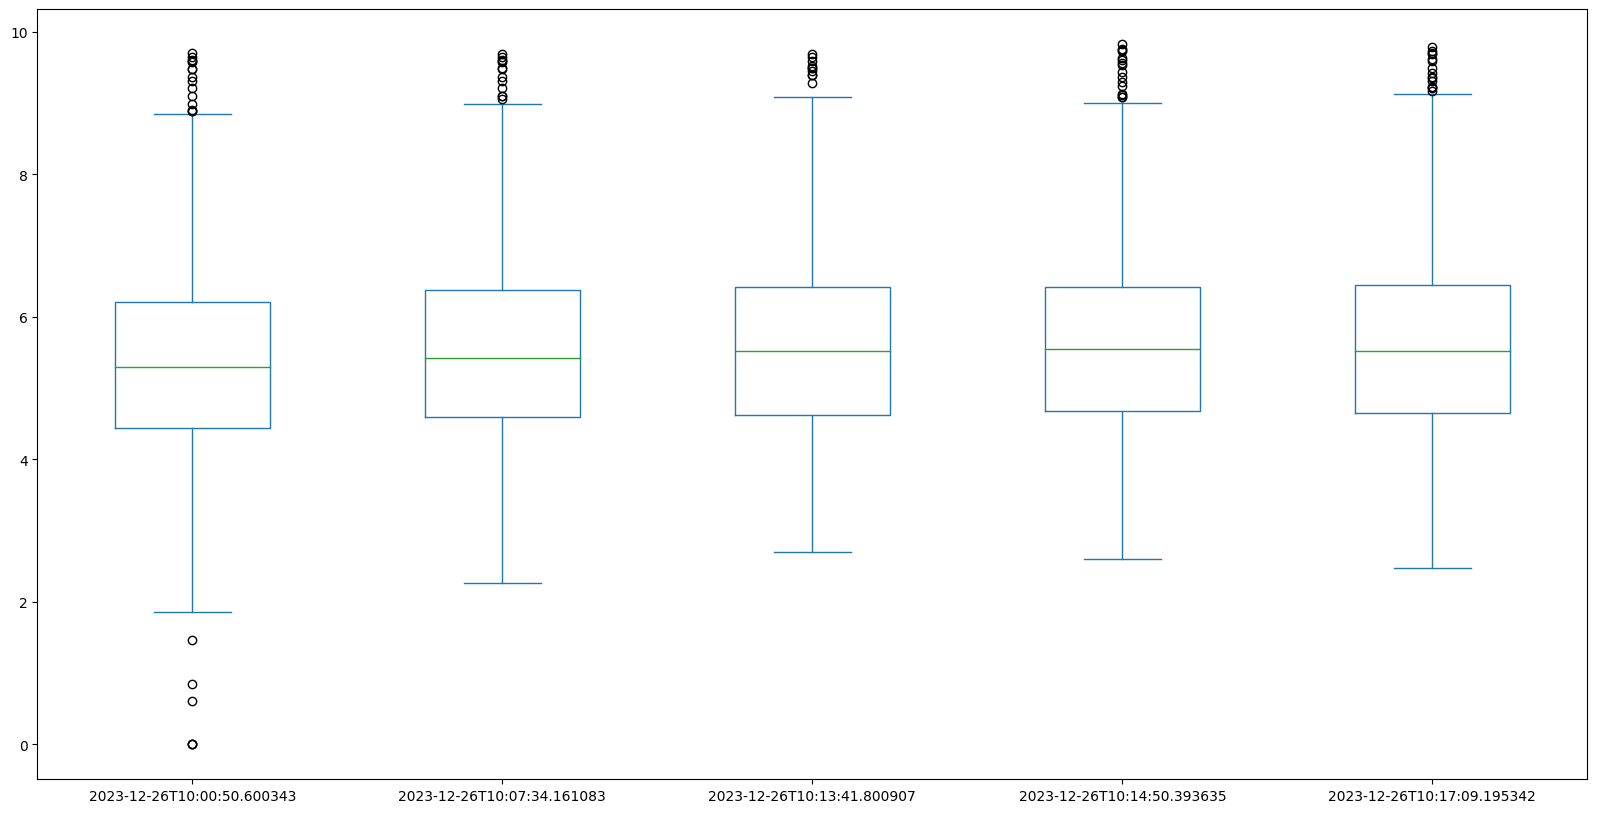

In [352]:
df.plot(kind="box", figsize=(20, 10))
plt.show()

In [353]:
df.sort_values(by=[cur_time], ascending=False)

,2023-12-26T10:00:50.600343,2023-12-26T10:07:34.161083,2023-12-26T10:13:41.800907,2023-12-26T10:14:50.393635,2023-12-26T10:17:09.195342
0517.txt,9.609155,9.609155,9.696405,9.753075,9.794100
0759.txt,9.585633,9.585633,9.593643,9.727016,9.727986
0684.txt,9.580573,9.692347,9.495374,9.564112,9.697122
0696.txt,9.707227,9.573552,9.527763,9.826034,9.684918
0935.txt,9.484214,9.494544,9.489852,9.739267,9.620453
...,...,...,...,...,...
0336.txt,6.023946,6.348462,6.401755,6.481012,2.872156
0800.txt,5.369719,5.369719,5.693749,5.468350,2.836324
0936.txt,2.269513,2.269513,2.705008,2.718502,2.715167
0266.txt,3.102091,5.969785,5.890833,5.771293,2.700704


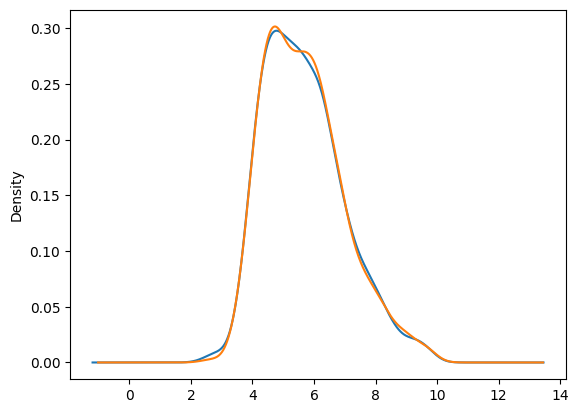

In [354]:
# bins = np.linspace(0, 10, 40)
last_sel = df.iloc[:, -1]
last_sel.plot.kde()
last2_sel = df.iloc[:, -2]
last2_sel.plot.kde()
plt.show()

In [355]:
last_df = df.iloc[:, -1]
wins = df.sub(last_df, axis=0)<0
loses = df.sub(last_df, axis=0)>0
win_cnt = wins.sum(axis=0)
lose_cnt = loses.sum(axis=0)
(win_cnt - lose_cnt).sort_index(ascending=False)

2023-12-26T10:17:09.195342      0
2023-12-26T10:14:50.393635     57
2023-12-26T10:13:41.800907    236
2023-12-26T10:07:34.161083    288
2023-12-26T10:00:50.600343    368
dtype: int64